In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, figure
#%matplotlib qt



Part 1

In [2]:
random_vec = []
min = 1
for i in range(1000):
    val = np.random.random()
    random_vec.append(val)
    if val < min:
        min = val
        min_loc = i

print(f'The minumum value is{min} \t The lacation of this value: {min_loc}')

The minumum value is0.0001574246441314875 	 The lacation of this value: 960


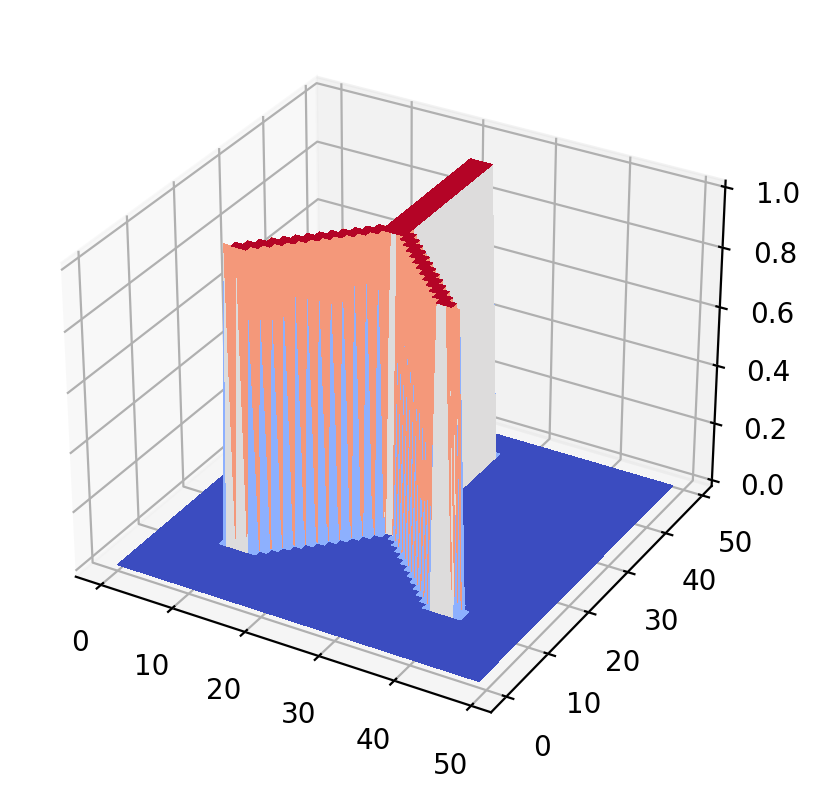

In [15]:
ygrid = np.zeros((50,50))

for i in range(50):
    for j in range(50):
        if j < 25 and j > 10:
            if i == j:
                ygrid[i, j-2:j+2] = 1
                ygrid[i, -(j+2):-(j-2)] = 1
        if j > 24 and j < 45:
            ygrid[j, 23:27] = 1
X = np.linspace(0, 49)
Y = np.linspace(0, 49)
X, Y = np.meshgrid(X, Y) 
fig = plt.figure(dpi=200)
fig.clear() 
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, ygrid, cmap=cm.coolwarm, antialiased=False) 
plt.draw() 

#1

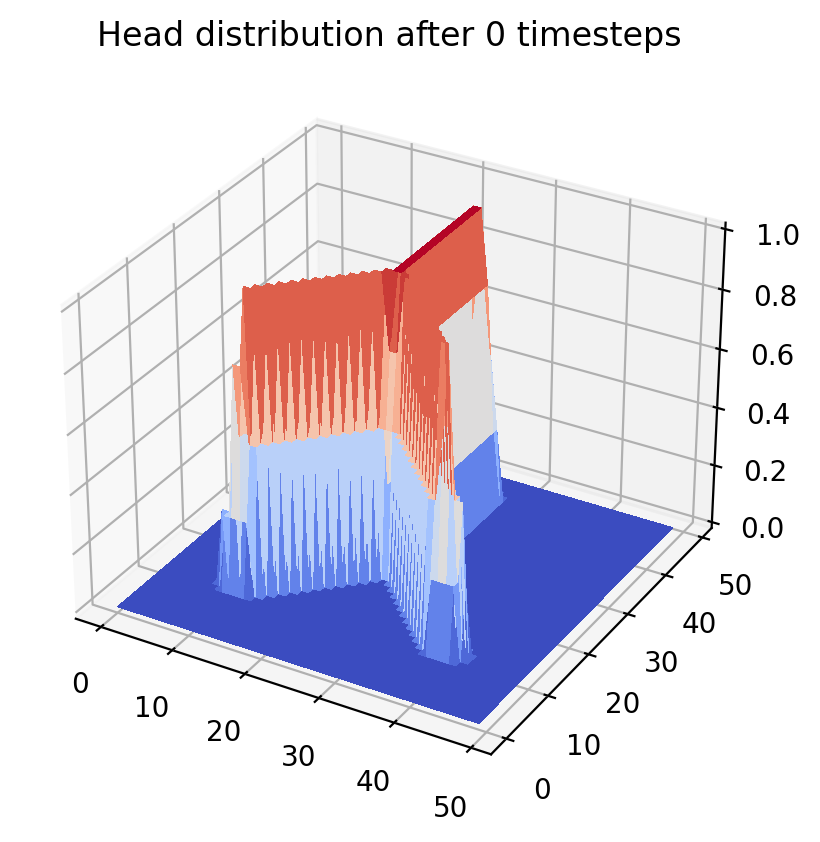

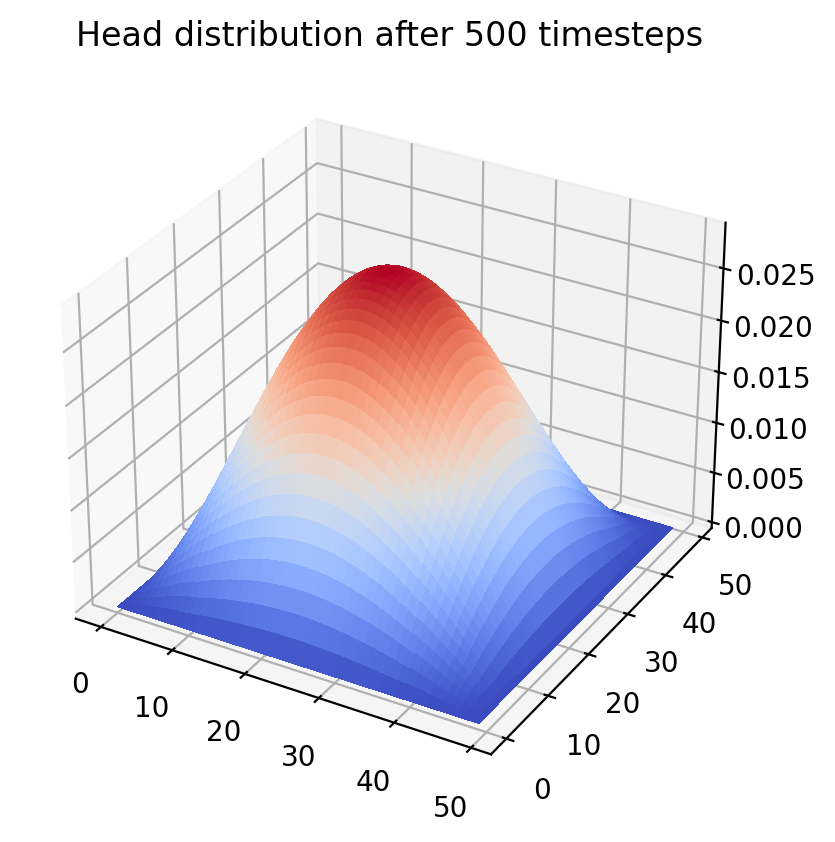

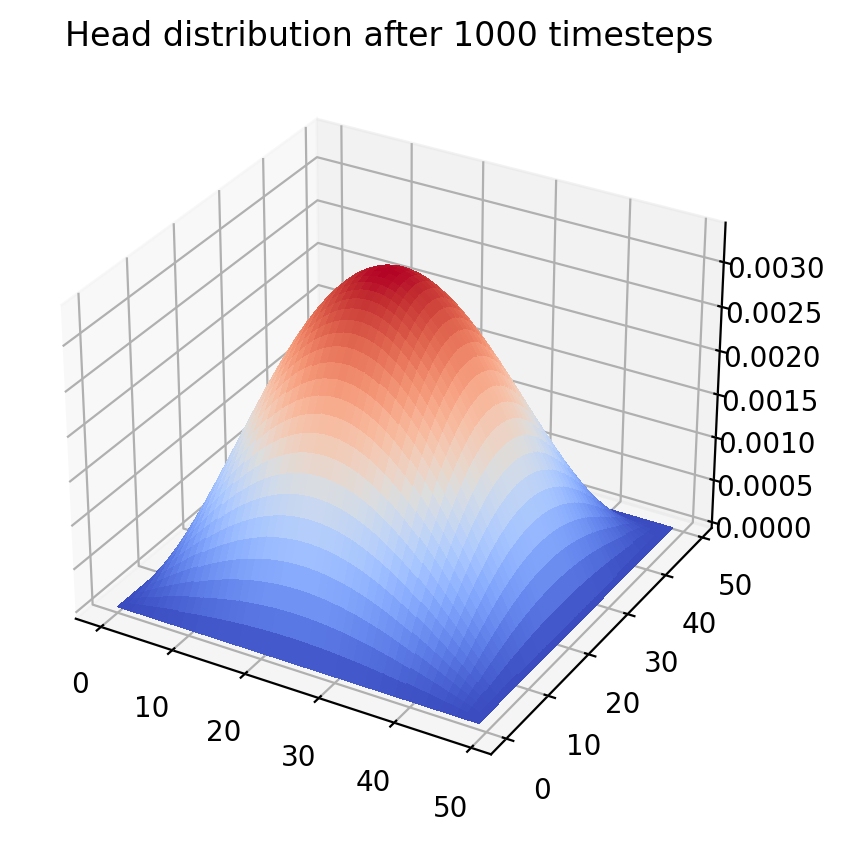

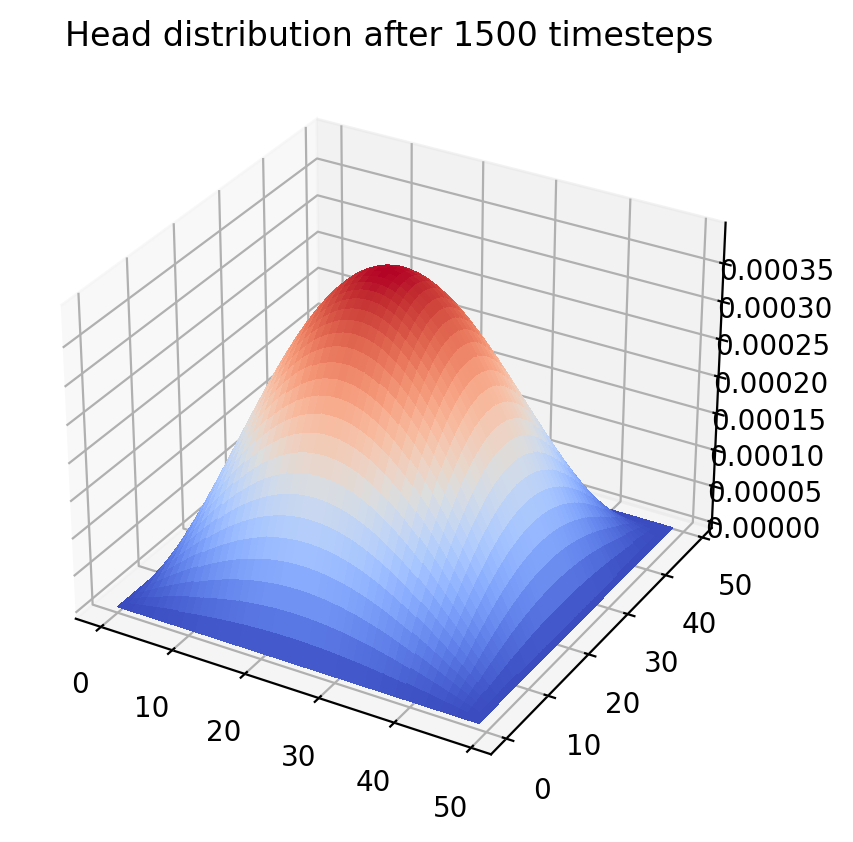

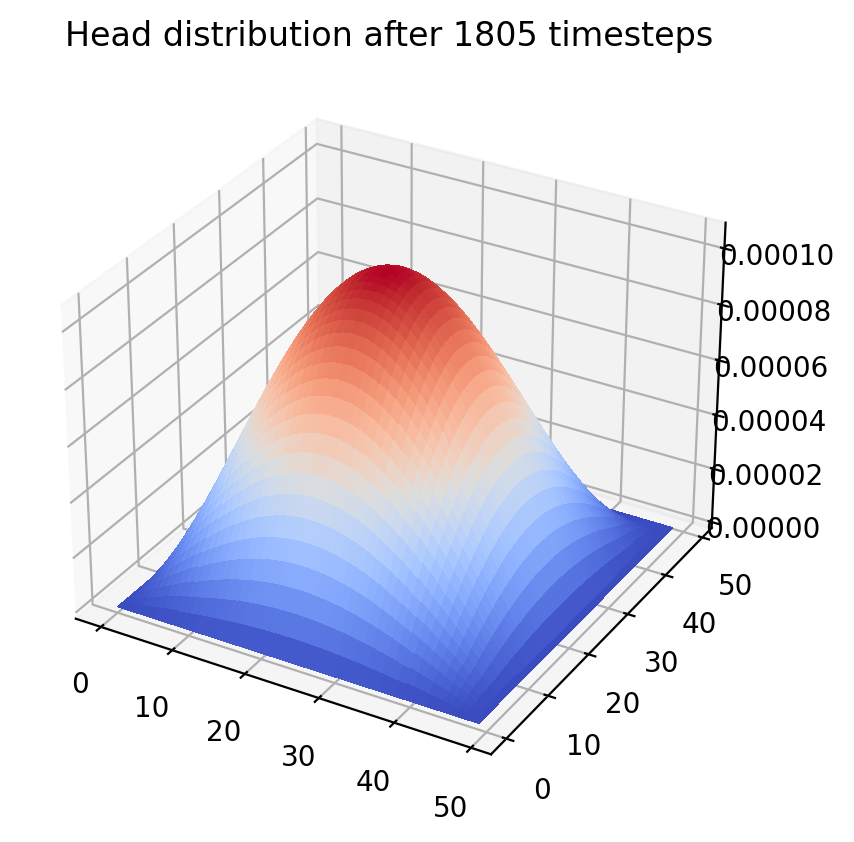

Our system reaches a low after 1805 iterations and the minimum energy in the system sums to <.1


In [62]:
def temp_new(point, data):
    x, y = point[0], point[1]
    tnew = (data[x,y+1] + data[x, y-1] + data[x+1, y] + data[x-1, y])/4
    return tnew


tnew = np.zeros((50, 50))
current_t = ygrid.copy()
for i in range(5000):
    sum = 0
    for x in range(1, 50-2):
        for y in range(1, 50-2):
            point = [x,y]
            tnew[x, y] = temp_new(point, current_t)
            sum+=tnew[x,y]
    if sum < .1:                                      #Testing how low the energy in the system is             
        X = np.linspace(0, 49)
        Y = np.linspace(0, 49)
        X, Y = np.meshgrid(X, Y) 
        fig = plt.figure(dpi=200)
        fig.clear() 
        ax = fig.add_subplot(projection='3d')

        ax.plot_surface(X, Y, current_t, cmap=cm.coolwarm, antialiased=False) 
        plt.title(f'Head distribution after {i} timesteps')
        plt.draw() 
        plt.pause(0.05) # choose the time argument between 0.01 and 0.5 
        break



    current_t = tnew
    current_t[:,0] = 0
    current_t[:, 49] = 0
    current_t[49,:] = 0
    current_t[49,:] = 0
    if i%500 == 0:
        X = np.linspace(0, 49)
        Y = np.linspace(0, 49)
        X, Y = np.meshgrid(X, Y) 
        fig = plt.figure(dpi=200)
        fig.clear() 
        ax = fig.add_subplot(projection='3d')
        plt.title(f'Head distribution after {i} timesteps')
        ax.plot_surface(X, Y, current_t, cmap=cm.coolwarm, antialiased=False) 
        plt.draw() 
        plt.pause(0.05) # choose the time argument between 0.01 and 0.5 
print(f'Our system reaches a low after {i} iterations and the minimum energy in the system sums to <.1')


#2

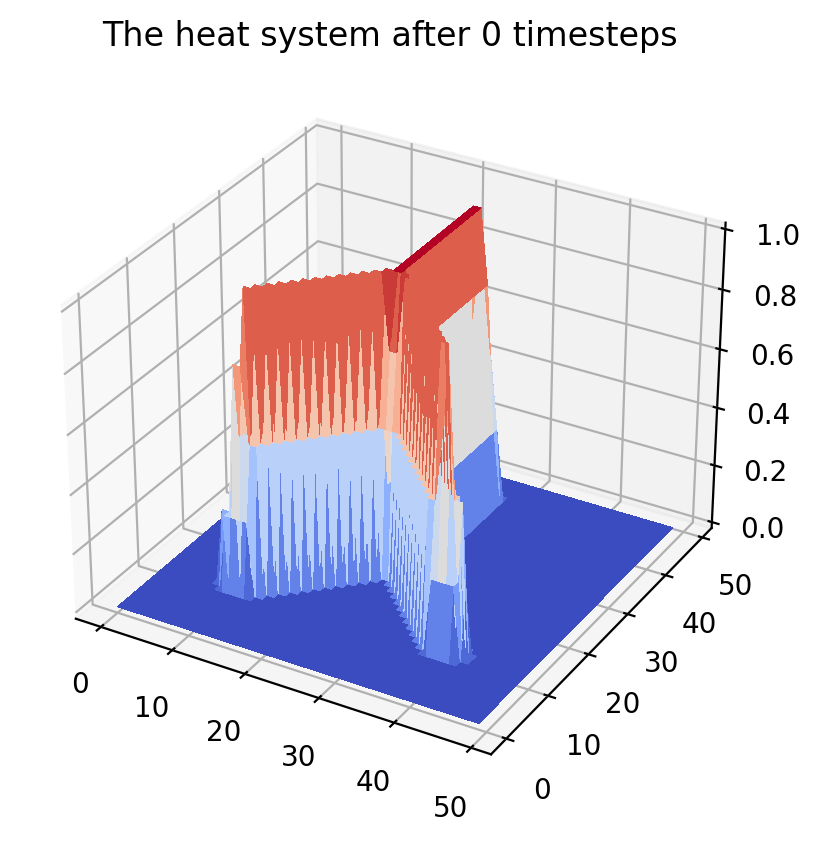

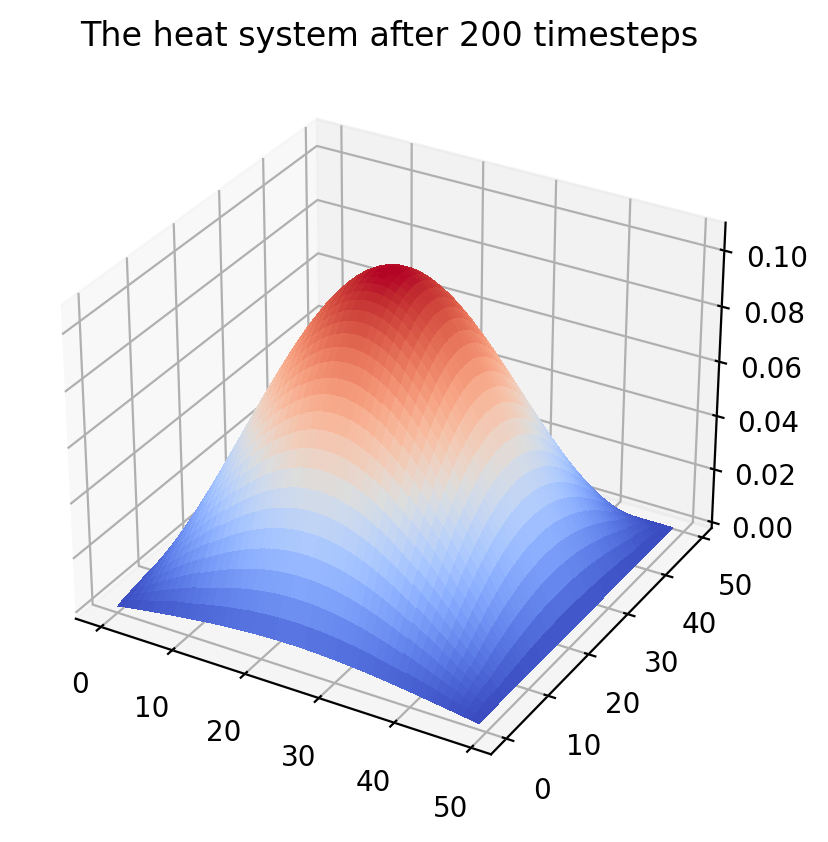

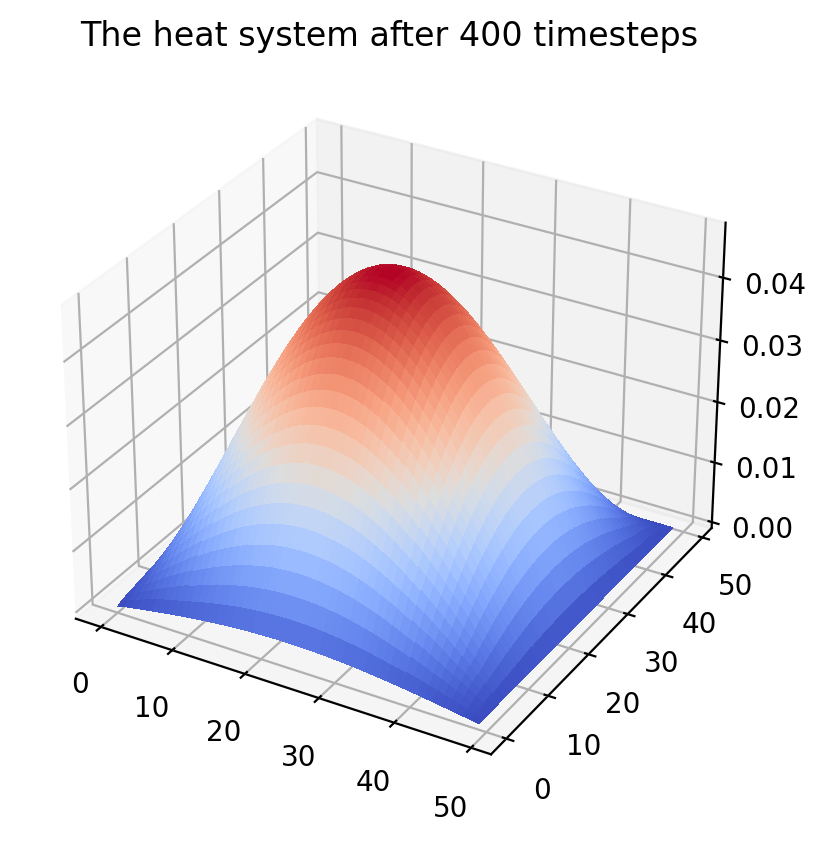

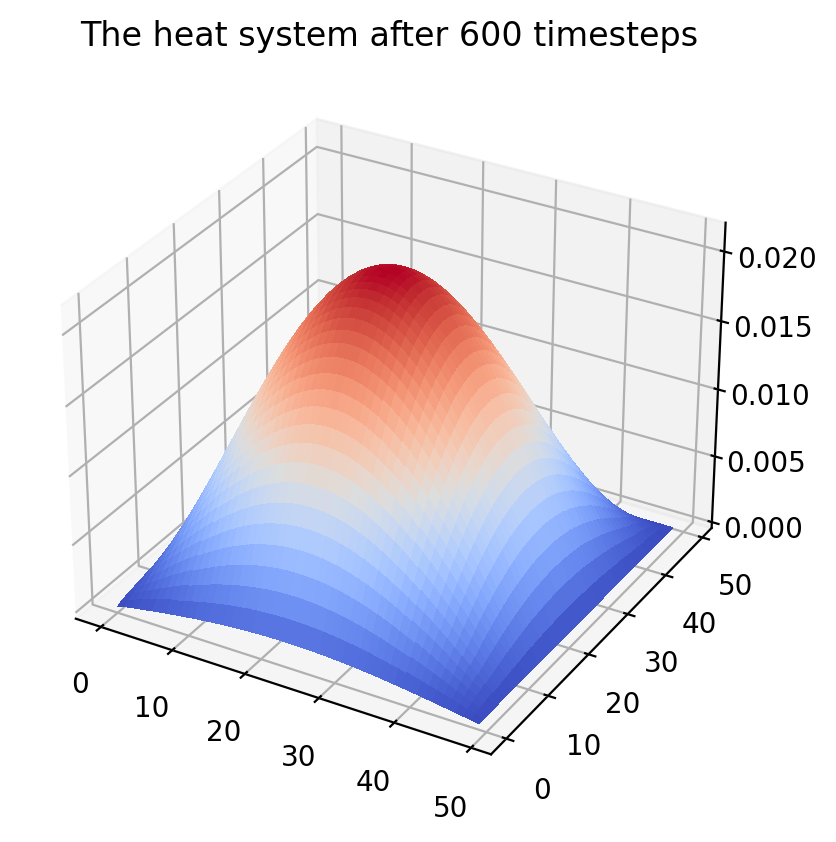

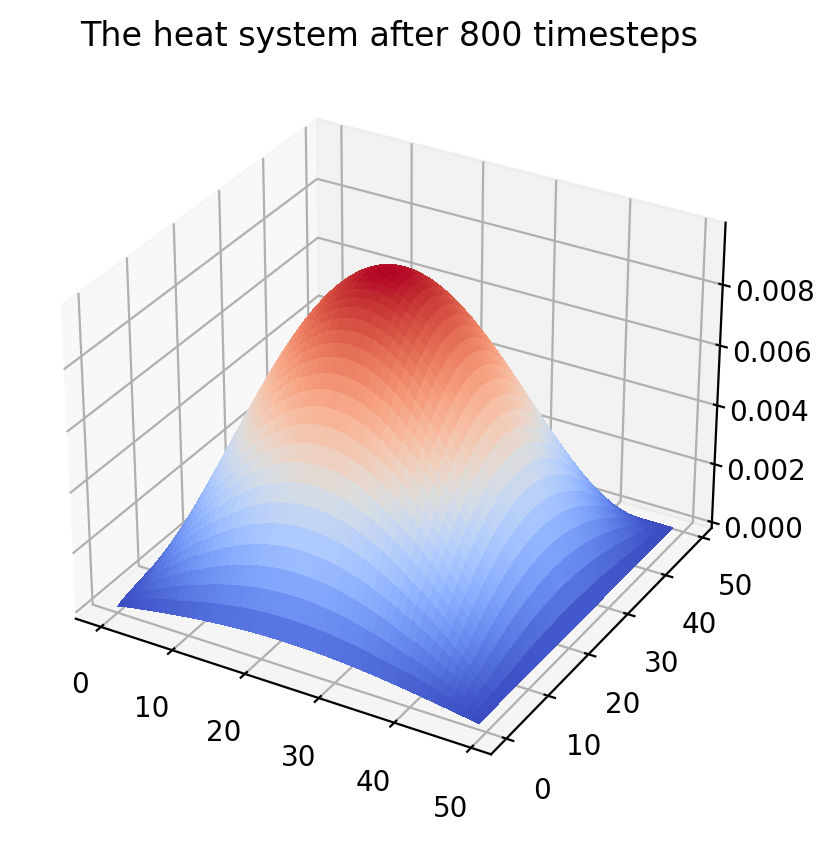

In [63]:
from matplotlib import cm


def temp_new2(point, data):
    x, y = point[0], point[1]
    if (y == 0 and x ==0):
        tnew = (2*data[0,0], +data[1,0] + data[0,1])/4
    elif (y == 0 and x == 49):
        tnew = (2*data[49,0], +data[48,0] + data[49,1])/4
    elif (y == 49 and x == 49):
        tnew = (2*data[49,49], +data[48,49] + data[49,48])/4
    elif (y == 49 and x == 0):
        tnew = (2*data[0,49], +data[1,49] + data[0,48])/4
    elif (y == 0):
        tnew = (1/4)*(data[x, 0] + data[x+1, 0] + data[x-1, 0] + data[x, 1])
    elif (y == 49):
        tnew = (1/4)*(data[x, 49] + data[x+1, 49] + data[x-1, 49] + data[x, 48])
    elif (x == 49):
        tnew = (1/4)*(data[49, y] + data[49, y+1] + data[49, y-1] + data[48, y])
    elif (x ==0):
        tnew = (1/4)*(data[0, y] + data[0, y+1] + data[0, y-1] + data[1, y])
    else:
        tnew = (data[x,y+1] + data[x, y-1] + data[x+1, y] + data[x-1, y])/4
    return tnew

tnew = np.zeros((50, 50))
current_t = ygrid
for i in range(1000):
    for x in range(0, 49):
        for y in range(0, 49):
            point = [x,y]
            tnew[x, y] = temp_new(point, current_t)

    current_t = tnew
    current_t[0,0] = 0
    current_t[0, 49] = 0
    current_t[49,49] = 0
    current_t[49,0] = 0
    if i%200 == 0:
        X = np.linspace(0, 49)
        Y = np.linspace(0, 49)
        X, Y = np.meshgrid(X, Y) 
        fig = plt.figure(dpi=200)
        fig.clear() 
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(X, Y, current_t, cmap=cm.coolwarm, antialiased=False) 
        plt.title(f'The heat system after {i} timesteps')
        plt.draw() 
        plt.pause(0.05) # choose the time argument between 0.01 and 0.5 
    
    # if i%500 == 0:
    #     plt.imshow(current_t)
    #     plt.show()